In [63]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize']=(10,10)
from sklearn.metrics import accuracy_score

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv("stroke.csv")

In [5]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Exploratory data analysis

In [6]:
data.shape

(5110, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# Lets drop null values

In [9]:
data['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [10]:
data.dropna(inplace=True)

In [11]:
data.shape

(4909, 12)

In [12]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [13]:
data.drop('id',axis=1,inplace=True)

In [14]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Outlier 

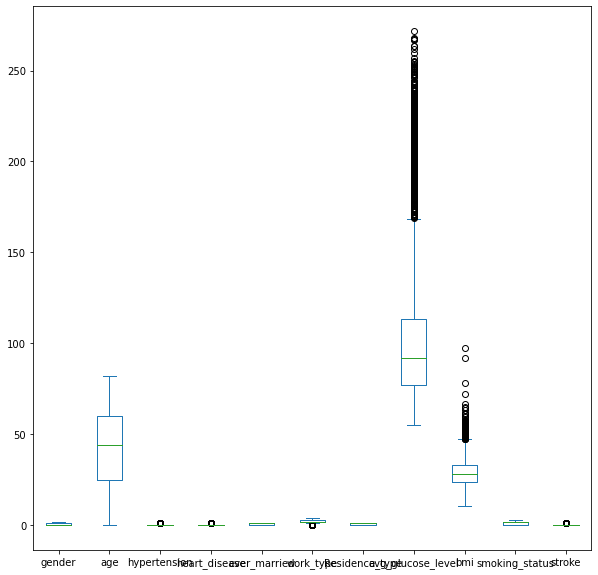

In [64]:

data.plot(kind='box')
plt.show()

In [16]:
data['avg_glucose_level'].describe()

count    4909.000000
mean      105.305150
std        44.424341
min        55.120000
25%        77.070000
50%        91.680000
75%       113.570000
max       271.740000
Name: avg_glucose_level, dtype: float64

# Label Encoding

In [17]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


In [19]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [20]:
gender=enc.fit_transform(data['gender'])

In [21]:
smoking_status=enc.fit_transform(data['smoking_status'])

In [22]:
work_type=enc.fit_transform(data['work_type'])
Residence_type=enc.fit_transform(data['Residence_type'])
ever_married=enc.fit_transform(data['ever_married'])

In [23]:
data['gender']=gender
data['smoking_status']=smoking_status
data['work_type']=work_type
data['Residence_type']=Residence_type
data['ever_married']=ever_married

In [24]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,4,0,103.08,18.6,0,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   int32  
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   int32  
 5   work_type          4909 non-null   int32  
 6   Residence_type     4909 non-null   int32  
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   int32  
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 364.3 KB


# splitting the data for train and test

In [26]:
X=data.drop('stroke',axis=1)

In [27]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.6,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2
3,0,49.0,0,0,1,2,1,171.23,34.4,3
4,0,79.0,1,0,1,3,0,174.12,24.0,2
5,1,81.0,0,0,1,2,1,186.21,29.0,1
...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,4,0,103.08,18.6,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2
5107,0,35.0,0,0,1,3,0,82.99,30.6,2
5108,1,51.0,0,0,1,2,0,166.29,25.6,1


In [28]:
Y=data['stroke']

In [29]:
Y

0       1
2       1
3       1
4       1
5       1
       ..
5104    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 4909, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)


In [31]:
x_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1147,1,37.0,0,0,1,2,0,78.42,29.9,2
1414,1,78.0,0,1,1,3,1,228.70,34.0,0
2723,0,31.0,0,0,0,2,1,89.11,51.9,3
370,1,44.0,0,0,1,2,0,74.91,37.5,2
86,1,61.0,0,1,1,2,0,111.81,27.3,3
...,...,...,...,...,...,...,...,...,...,...
4260,1,64.0,0,0,1,2,1,62.21,28.3,0
4354,0,34.0,0,0,0,2,0,94.37,38.1,2
645,1,53.0,0,0,1,3,1,76.36,29.8,0
1435,0,54.0,0,1,1,2,1,140.28,37.1,1


In [32]:
y_train

1147    0
1414    0
2723    0
370     0
86      1
       ..
4260    0
4354    0
645     0
1435    0
1630    0
Name: stroke, Length: 3927, dtype: int64

In [33]:
x_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3231,0,57.0,0,0,1,0,1,104.36,19.2,3
4404,1,73.0,0,0,1,2,1,101.58,35.9,2
3853,0,47.0,0,0,1,3,0,157.77,28.4,2
2318,0,51.0,1,0,1,2,1,173.96,31.2,1
3995,1,45.0,0,0,1,2,0,95.62,29.5,3
...,...,...,...,...,...,...,...,...,...,...
4842,1,1.8,0,0,0,4,1,153.31,17.1,0
3497,0,37.0,0,0,1,2,1,100.22,22.7,3
2740,1,15.0,0,0,0,1,0,79.59,28.4,0
3494,0,66.0,0,0,1,2,1,112.77,22.7,3


In [34]:
y_test

3231    0
4404    0
3853    0
2318    0
3995    0
       ..
4842    0
3497    0
2740    0
3494    0
3583    0
Name: stroke, Length: 982, dtype: int64

# Normalize

In [35]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,0.410063,42.865374,0.091872,0.049501,0.652679,2.170096,0.507232,105.305150,28.893237,1.375433,0.042575
std,0.492309,22.555115,0.288875,0.216934,0.476167,1.092593,0.499999,44.424341,7.854067,1.067322,0.201917
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.070000,23.500000,0.000000,0.000000
50%,0.000000,44.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.680000,28.100000,2.000000,0.000000
75%,1.000000,60.000000,0.000000,0.000000,1.000000,3.000000,1.000000,113.570000,33.100000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [36]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [37]:
x_train_std=std.fit_transform(x_train)
x_test_std=std.transform(x_test)

In [38]:
x_train_std

array([[ 1.2059758 , -0.25853712, -0.3196265 , ..., -0.59896361,
         0.12508024,  0.57593339],
       [ 1.2059758 ,  1.57036655, -0.3196265 , ...,  2.78626161,
         0.64495206, -1.30176724],
       [-0.82745785, -0.52618156, -0.3196265 , ..., -0.35815939,
         2.91463634,  1.5147837 ],
       ...,
       [ 1.2059758 ,  0.45518138, -0.3196265 , ..., -0.64536741,
         0.11240044, -1.30176724],
       [-0.82745785,  0.49978879, -0.3196265 , ...,  0.79450214,
         1.03802587, -0.36291693],
       [-0.82745785,  1.70418877, -0.3196265 , ...,  0.22233871,
        -1.34577661, -0.36291693]])

In [39]:
x_test_std

array([[-0.82745785,  0.63361101, -0.3196265 , ..., -0.01463607,
        -1.2316584 ,  1.5147837 ],
       [ 1.2059758 ,  1.34732952, -0.3196265 , ..., -0.07725868,
         0.88586827,  0.57593339],
       [-0.82745785,  0.18753694, -0.3196265 , ...,  1.18848397,
        -0.06511676,  0.57593339],
       ...,
       [ 1.2059758 , -1.23990007, -0.3196265 , ..., -0.57260805,
        -0.06511676, -1.30176724],
       [-0.82745785,  1.03507767, -0.3196265 , ...,  0.17480859,
        -0.78786539,  1.5147837 ],
       [-0.82745785,  0.32135916, -0.3196265 , ..., -0.79043562,
        -1.29505741, -0.36291693]])

# Random oversampling

In [40]:
from sklearn.utils import resample

In [41]:
df_majority=data[data['stroke']==0]
df_minority=data[data['stroke']==1]

In [42]:
data['stroke'].value_counts()

0    4700
1     209
Name: stroke, dtype: int64

In [43]:
df_minority_oversampled=resample(df_minority,replace=True,n_samples=4700,random_state=0)


In [44]:
df_oversampled=pd.concat([df_majority,df_minority_oversampled])

In [45]:
df_oversampled['stroke'].value_counts()

0    4700
1    4700
Name: stroke, dtype: int64

In [46]:
x1=df_oversampled.drop(['stroke'],axis=1)
y1=df_oversampled['stroke']

# partioning

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=101)

# Normalize

In [48]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [49]:
x_train_std1=std.fit_transform(x_train)
x_test_std1=std.transform(x_test)

In [50]:
import pickle 
import os

In [51]:
scaler_path=os.path.join('C:/Users/mirav/OneDrive/Documents/Stroke Mini Project/','models/scaler.pkl')
with open(scaler_path,'wb') as scaler_file:
    pickle.dump(std,scaler_file)

# Hyperparameter Tuning and Cross Validation

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC




##  Random Forest

In [54]:
rfc=RandomForestClassifier(random_state=42)

In [55]:
param_grid = { 
    'n_estimators': [200, 500,1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [56]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500, 1000]})

In [57]:
CV_rfc.cv_results_


{'mean_fit_time': array([1.02112341, 2.57925949, 5.14260578, 1.00659733, 2.51509199,
        5.05330091, 1.00250115, 2.53009152, 5.04067783, 1.13085246,
        2.79399486, 5.61843252, 1.09857445, 2.76637077, 5.53311682,
        1.10646286, 2.78150406, 5.51348476, 1.20563259, 3.01837072,
        6.00432258, 1.19245472, 2.97254033, 5.93527236, 1.20273385,
        2.98975892, 5.92205997, 1.28700247, 3.20695858, 6.41162515,
        1.27162085, 3.15143752, 6.31753759, 1.26635289, 3.15362296,
        6.30194077, 1.34470243, 3.38654122, 6.73656411, 1.33793416,
        3.33518372, 6.79801512, 1.34316592, 3.43904071, 6.75723968,
        1.122049  , 2.80126286, 5.58351173, 1.08977132, 2.62142687,
        4.69913344, 0.85587983, 2.37747188, 5.49587927, 1.24855332,
        3.07651753, 6.14743958, 1.21549916, 3.03272142, 6.075701  ,
        1.22055321, 3.00381212, 6.04333048, 1.3172091 , 3.30376682,
        6.68393817, 1.29685335, 3.24516468, 6.57038469, 1.31031842,
        3.27981749, 6.55154529,

In [58]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [59]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=8, criterion='gini')

In [60]:
rfc1.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, max_features='auto', n_estimators=500,
                       random_state=42)

In [61]:
pred=rfc1.predict(x_test)

In [62]:
from sklearn.metrics import accuracy_score
rf_score=accuracy_score(y_test,pred)
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.8957446808510638


## SVM 

In [63]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid,cv=5,refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.953 total time=   7.9s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.955 total time=   7.9s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.947 total time=   7.9s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.950 total time=   8.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.950 total time=   8.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.969 total time=   7.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.976 total time=   7.3s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.972 total time=   7.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.971 total time=   7.3s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.983 total time=   7.4s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.801 total time=   3.6s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [64]:
print(grid.best_params_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [65]:
sv=SVC(C=1,gamma=1,kernel='rbf')


In [66]:
sv.fit(x_train,y_train)

SVC(C=1, gamma=1)

In [67]:
pred1=sv.predict(x_test)

In [68]:
svm_score=accuracy_score(y_test,pred1)

In [69]:
print("Accuracy for SVM on CV data: ",accuracy_score(y_test,pred1))

Accuracy for SVM on CV data:  1.0


## KNN

In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()


In [71]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=False,verbose=1)


In [72]:
grid_search=grid.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [73]:
print(grid_search.best_params_)

{'n_neighbors': 1}


In [74]:
knn1=KNeighborsClassifier(n_neighbors=1)
knn1.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=1)

In [75]:
pred2=knn1.predict(x_test)

In [76]:
knn_score=accuracy_score(y_test,pred2)

In [77]:
print("Accuracy for KNN on CV data: ",accuracy_score(y_test,pred2))

Accuracy for KNN on CV data:  0.975531914893617


## Decision Tree 

In [78]:
from sklearn.tree import DecisionTreeClassifier
param_grid1 = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search1 = GridSearchCV(estimator=tree_clas, param_grid=param_grid1, cv=5, verbose=True)


In [79]:
grid_d=grid_search1.fit(x_train, y_train)


Fitting 5 folds for each of 90 candidates, totalling 450 fits


In [80]:
print(grid_d.best_params_)

{'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto'}


In [81]:
dt=DecisionTreeClassifier(random_state=1024,ccp_alpha=0.001,criterion='entropy',max_depth=9,max_features='auto')


In [82]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='auto', random_state=1024)

In [83]:
pred3=knn1.predict(x_test)

In [84]:
dt_score=accuracy_score(y_test,pred3)

In [85]:
print("Accuracy for DecisonTree on CV data: ",accuracy_score(y_test,pred3))

Accuracy for DecisonTree on CV data:  0.975531914893617


## Xgboost 

In [53]:
from xgboost import XGBClassifier
gs_xgb = XGBClassifier(
    eta= 0.3, 
    n_estimators= 500,
    gamma= 0,
    max_depth= 6, 
    min_child_weight= 1,
    colsample_bytree= 1, 
    colsample_bylevel= 1, 
    subsample= 1, 
    reg_lambda= 1, 
    reg_alpha= 0,
    seed= 33
)

In [54]:
scale_tree_params = {
    'max_depth':[3,5,7,9],
    'min_child_weight':[1,3,5]
}


In [55]:
grid_search2 = GridSearchCV(estimator=gs_xgb, param_grid=scale_tree_params, cv=5, verbose=True)


In [56]:
grid_d1=grid_search2.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [57]:
print(grid_d1.best_params_)

{'max_depth': 7, 'min_child_weight': 1}


In [58]:
xg=XGBClassifier(
    eta= 0.3, 
    n_estimators= 500,
    gamma= 0,
    colsample_bytree= 1, 
    colsample_bylevel= 1, 
    subsample= 1, 
    reg_lambda= 1, 
    reg_alpha= 0,
    seed= 33,
    max_depth=7,
    min_child_weight=1
)

In [59]:
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=0.3,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [60]:
pred4=xg.predict(x_test)

In [65]:
xg_score=accuracy_score(y_test,pred4)

In [66]:
print("Accuracy for XGBoost on CV data: ",accuracy_score(y_test,pred4))

Accuracy for XGBoost on CV data:  0.9872340425531915


In [67]:
import joblib

In [68]:
model_path=os.path.join('C:/Users/mirav/OneDrive/Documents/Stroke Mini Project/','models/xg.sav')
joblib.dump(xg,model_path)

['C:/Users/mirav/OneDrive/Documents/Stroke Mini Project/models/xg.sav']

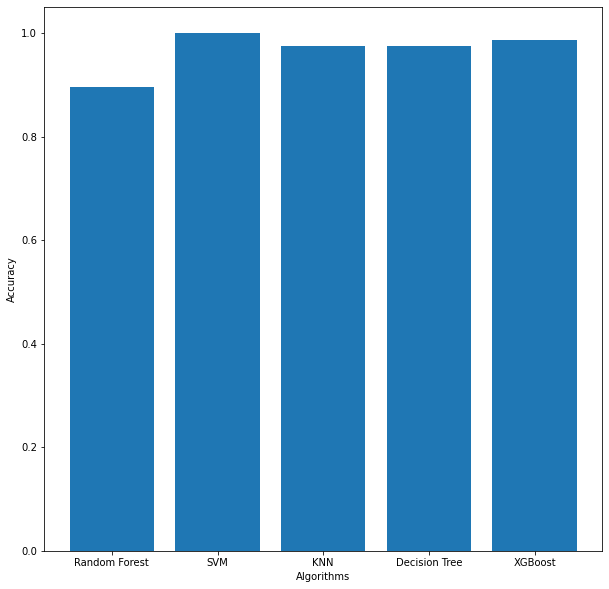

In [97]:
plt.bar(['Random Forest','SVM','KNN','Decision Tree','XGBoost'],[rf_score,svm_score,knn_score,dt_score,xg_score])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()